In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nn.nn import NeuralNetwork
digits = load_digits()
X = digits.data

# Normalize the data to [0,1] range
X = X / np.max(X)
def train_val_split(X, val_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - val_size))
    train_indices = indices[:split_idx]
    val_indices = indices[split_idx:]
    return X[train_indices], X[val_indices]

X_train, X_val = train_val_split(X)
autoencoder_arch = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},    # Encoder
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}  # Decoder
]

autoencoder = NeuralNetwork(
    nn_arch=autoencoder_arch,
    lr=0.01,
    seed=42,
    batch_size=32,
    epochs=5,
    loss_function='mse'
)
train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

Epoch 1 of 5
Testing loss: 5.8570
Validation loss: 5.8725
Epoch 2 of 5
Testing loss: 5.8385
Validation loss: 5.8545
Epoch 3 of 5
Testing loss: 5.8208
Validation loss: 5.8369
Epoch 4 of 5
Testing loss: 5.8038
Validation loss: 5.8196
Epoch 5 of 5
Testing loss: 5.7866
Validation loss: 5.8027


# Autoencoder

This notebook:

* Reads in data and generates training and validation sets
* Successfully trains autoencoder
* Plots training and validation loss
* Quantifies reconstruction error
* Explans hyperparameters

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nn.nn import NeuralNetwork

## Load and preprocess the dataset

In [3]:
digits = load_digits()
X = digits.data

# Normalize the data to [0,1] range
X = X / np.max(X)

## Test and validation datasets

In [4]:
def train_val_split(X, val_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - val_size))
    train_indices = indices[:split_idx]
    val_indices = indices[split_idx:]
    return X[train_indices], X[val_indices]

X_train, X_val = train_val_split(X)

## Create the autoencoder

In [16]:
autoencoder_arch = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},    # Encoder
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}  # Decoder
]

autoencoder = NeuralNetwork(
    nn_arch=autoencoder_arch,
    lr=0.01,
    seed=42,
    batch_size=32,
    epochs=5000,
    loss_function='mse'
)

## Train the autoencoder

In [17]:
train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

Epoch 1 of 5000
Testing loss: 5.8570
Validation loss: 5.8725
Epoch 2 of 5000
Testing loss: 5.8385
Validation loss: 5.8545
Epoch 3 of 5000
Testing loss: 5.8208
Validation loss: 5.8369
Epoch 4 of 5000
Testing loss: 5.8038
Validation loss: 5.8196
Epoch 5 of 5000
Testing loss: 5.7866
Validation loss: 5.8027
Epoch 6 of 5000
Testing loss: 5.7697
Validation loss: 5.7860
Epoch 7 of 5000
Testing loss: 5.7537
Validation loss: 5.7695
Epoch 8 of 5000
Testing loss: 5.7374
Validation loss: 5.7532
Epoch 9 of 5000
Testing loss: 5.7210
Validation loss: 5.7370
Epoch 10 of 5000
Testing loss: 5.7053
Validation loss: 5.7208
Epoch 11 of 5000
Testing loss: 5.6894
Validation loss: 5.7048
Epoch 12 of 5000
Testing loss: 5.6735
Validation loss: 5.6887
Epoch 13 of 5000
Testing loss: 5.6578
Validation loss: 5.6726
Epoch 14 of 5000
Testing loss: 5.6411
Validation loss: 5.6565
Epoch 15 of 5000
Testing loss: 5.6253
Validation loss: 5.6403
Epoch 16 of 5000
Testing loss: 5.6090
Validation loss: 5.6239
Epoch 17 of 5000


## Plot the loss

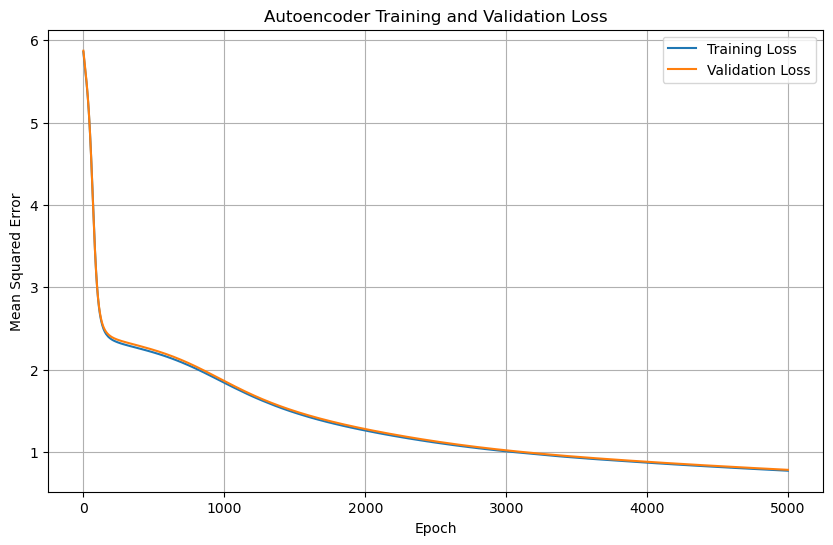

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Autoencoder Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Reconstruction error

In [19]:
reconstructed_val = autoencoder.predict(X_val).T
mse = np.mean((X_val - reconstructed_val) ** 2)
print(f"Avg reconstruction error on validation set: {mse:.4f}")

Avg reconstruction error on validation set: 0.0245


## Visualize reconstructed digits

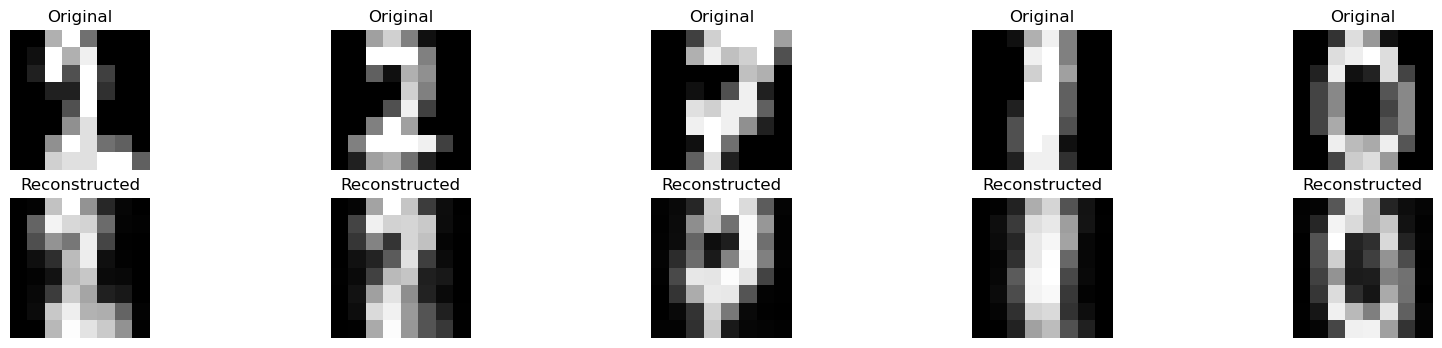

In [20]:
def plot_digits(original, reconstructed, n=5):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(8, 8), cmap='gray')
        plt.title('Original')
        plt.axis('off')
        
        # Reconstructed
        plt.subplot(2, n, i + n + 1)
        plt.imshow(reconstructed[i].reshape(8, 8), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.show()

# Display example reconstructions
plot_digits(X_val, reconstructed_val)


## Hyperparameter choices

**Architecture**
- 64 to 16 to 64
- Digit images are 8x8 pixels, so the input needs to be 64
- The latent space is 16
- The reconstruction of the autoencoder output also has to be 64

**Learning Rate (0.01)**
- Small enough to get stable training but not too small to cause it to take too long.
- Tested iteratively to see what values seemed to work. 


**Batch Size (32)**
- larger batches give better training stability but smaller batches help with generalizability
- 32 was a good traidoff when training on my Mac


**Number of Epochs (5000)**
- I upped this number since I saw the training loss and validation loss was still going down, indicative of a model that is not yet overtrained



**Loss Function (MSE)**
- Mean squared error is the correct function to use for this task given the assignment, since it is not a classifier. 
- Works well with normalized pixel values [0,1]

**Activation Functions**
- ReLU in hidden layer:
   * Prevents vanishing gradients
- Sigmoid in output layer:
     * Matches normalized input range [0,1]